In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !pip install h2o --user

In [14]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

clrs = np.array([[0.281446, 0.08432 , 0.407414],
       [0.283197, 0.11568 , 0.436115],
       [0.282884, 0.13592 , 0.453427],
       [0.28229 , 0.145912, 0.46151 ],
       [0.246811, 0.283237, 0.535941],
       [0.119483, 0.614817, 0.537692],
       [0.166383, 0.690856, 0.496502],
       [0.288921, 0.758394, 0.428426],
       [0.545524, 0.838039, 0.275626],
       [0.751884, 0.874951, 0.143228]])

In [ ]:
# import h2o

In [3]:
!ln -s /content/gdrive/My\ Drive/agio /agio

In [4]:
cd /agio

/content/gdrive/My Drive/agio


In [5]:
!ls

 311_SR_Data_Dictionary_2018.xlsx   nyc_311_EDA.ipynb
 agio				    nyc_311_getData.ipynb
 city_attributes.csv		    nyc_raw_subset.csv
 complaints_totals.csv		    nyc_weather.csv
 complaints_totals.gsheet	    pressure.csv
 daily_weather.csv		    temperature.csv
 humidity.csv			    weather_description.csv
 model.png			    weather_eda.ipynb
 nyc_311_2016.csv		    wind_direction.csv
'nyc_311_>2016_samp.csv'	    wind_speed.csv
 nyc_311_data.csv


In [27]:
!mkdir fig

## Read data

In [6]:
%%time 
col_idxs = [0,1,2,3,4,5,6,7,8,11,12,19,20,22,25,28]

df = pd.read_csv('nyc_311_data.csv', usecols = col_idxs)

<string>:2: DtypeWarning: Columns (8,20) have mixed types.Specify dtype option on import or set low_memory=False.


CPU times: user 2min 50s, sys: 18 s, total: 3min 8s
Wall time: 3min 44s


In [7]:
df.shape

(24219783, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24219783 entries, 0 to 24219782
Data columns (total 16 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   Unique Key                      int64 
 1   Created Date                    object
 2   Closed Date                     object
 3   Agency                          object
 4   Agency Name                     object
 5   Complaint Type                  object
 6   Descriptor                      object
 7   Location Type                   object
 8   Incident Zip                    object
 9   Cross Street 1                  object
 10  Cross Street 2                  object
 11  Status                          object
 12  Due Date                        object
 13  Resolution Action Updated Date  object
 14  Borough                         object
 15  Open Data Channel Type          object
dtypes: int64(1), object(15)
memory usage: 2.9+ GB


In [9]:
cols = df.columns
cols = [col.lower().replace(' ','_') for col in cols]

df.columns = cols

In [10]:
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,cross_street_1,cross_street_2,status,due_date,resolution_action_updated_date,borough,open_data_channel_type
0,42147537,04/05/2019 02:27:21 PM,04/11/2019 07:31:35 AM,DOT,Department of Transportation,Street Condition,"Rough, Pitted or Cracked Roads",Street,10301,NaN,NaN,Closed,07/04/2019 02:27:21 PM,04/11/2019 07:31:35 AM,STATEN ISLAND,PHONE
1,42147538,04/05/2019 11:00:01 PM,04/06/2019 01:29:19 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10024,WEST 81 STREET,WEST 82 STREET,Closed,04/06/2019 07:00:01 AM,04/06/2019 01:29:19 AM,MANHATTAN,PHONE
2,42147539,04/05/2019 09:38:05 AM,04/05/2019 12:29:20 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Bike Lane,Street/Sidewalk,11106,36 AVENUE,37 AVENUE,Closed,04/05/2019 05:38:05 PM,04/05/2019 12:29:20 PM,QUEENS,ONLINE
3,42147540,04/05/2019 09:49:18 AM,04/16/2019 09:20:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,11223,AVENUE S,HIGHLAWN AVENUE,Closed,NaN,04/16/2019 09:20:00 AM,BROOKLYN,UNKNOWN
4,42147541,04/05/2019 11:58:43 AM,04/05/2019 09:55:00 PM,DOT,Department of Transportation,Street Condition,Pothole,NaN,10003,NaN,NaN,Closed,NaN,04/05/2019 09:55:00 PM,MANHATTAN,UNKNOWN


In [11]:
df.tail()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,cross_street_1,cross_street_2,status,due_date,resolution_action_updated_date,borough,open_data_channel_type
24219778,42147532,04/05/2019 11:30:09 AM,04/05/2019 10:34:23 PM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11219,59 STREET,60 STREET,Closed,04/05/2019 07:30:09 PM,04/05/2019 10:34:23 PM,BROOKLYN,ONLINE
24219779,42147533,04/05/2019 02:05:01 PM,04/19/2019 04:18:42 PM,DOT,Department of Transportation,Sidewalk Condition,Broken Sidewalk,Sidewalk,10461,BRUCKNER BOULEVARD,BURR AVENUE,Closed,05/05/2019 02:05:01 PM,04/19/2019 04:18:42 PM,BRONX,PHONE
24219780,42147534,04/05/2019 09:00:43 AM,04/22/2019 10:59:38 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Payment Not Posted,Property Address,11374,63 AVENUE,63 DRIVE,Closed,04/26/2019 10:22:20 AM,04/22/2019 10:59:38 AM,QUEENS,PHONE
24219781,42147535,04/05/2019 09:58:55 AM,04/05/2019 10:06:18 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,11366,159 STREET,160 STREET,Closed,04/05/2019 05:58:55 PM,04/05/2019 10:06:18 AM,QUEENS,ONLINE
24219782,42147536,04/05/2019 05:17:51 PM,04/21/2019 01:06:17 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Non-Delivery of Papers,NaN,10301,CENTRAL AVENUE,ST MARKS PLACE,Closed,04/23/2019 10:33:24 AM,04/21/2019 01:06:17 AM,STATEN ISLAND,PHONE


In [ ]:
df.unique_key.nunique() #24219783

24219783

In [12]:
df.created_date = pd.to_datetime(df.created_date)

In [13]:
df.created_date.min(), df.created_date.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2020-10-24 02:03:41'))

In [ ]:
# df.to_csv('nyc_raw_subset.csv', index=False)

In [15]:
df['cnt'] = 1
df['_dt'] = df.created_date.dt.date

daily = df[['_dt', 'cnt']].groupby('_dt').sum()

daily.head()

,cnt
_dt,
2010-01-01,2925
2010-01-02,3894
2010-01-03,5635
2010-01-04,9372
2010-01-05,8380


In [16]:
daily.shape

(3950, 1)

## Full Raw Data

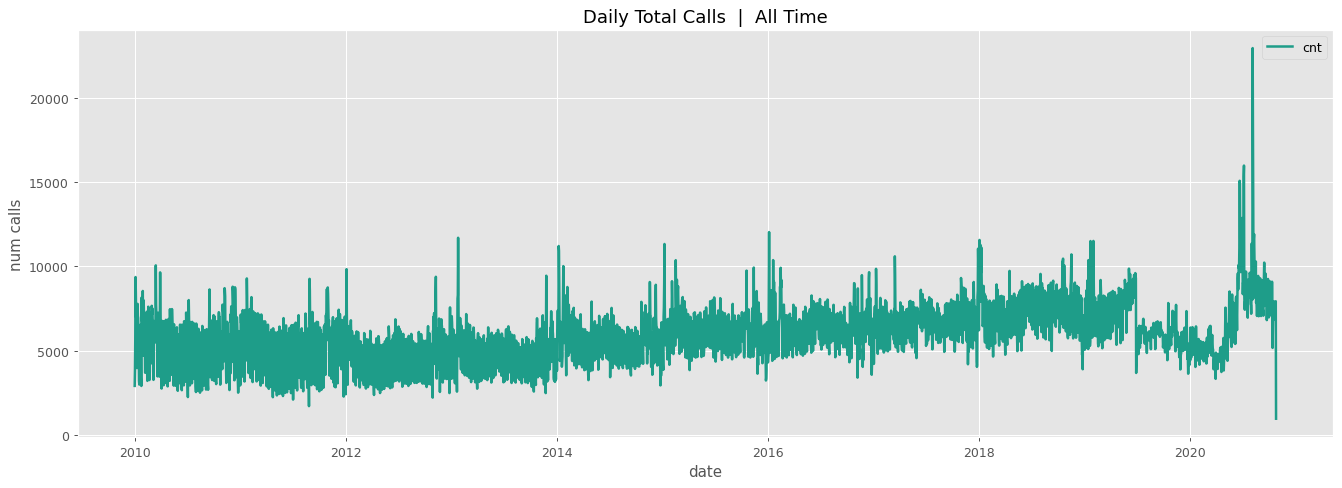

In [43]:
plt.figure(figsize=(18,6), dpi=90)
ax = plt.subplot()
daily.plot(color=[clrs[5]], linewidth=2, ax = ax)
ax.set_xlabel('date')
ax.set_ylabel('num calls')
ax.set_title('Daily Total Calls  |  All Time')

plt.savefig('fig/daily_all_time.png')

In [31]:
temp = daily.reset_index()

In [32]:
temp.rename(columns={'dt':'_dt'}, inplace=True)

In [33]:
temp._dt = pd.to_datetime(temp._dt)

In [34]:
daily_gt2016 = temp[temp['_dt'] >= '2016-01-01']

daily_gt2016.shape

(1759, 2)

## 2016 and on

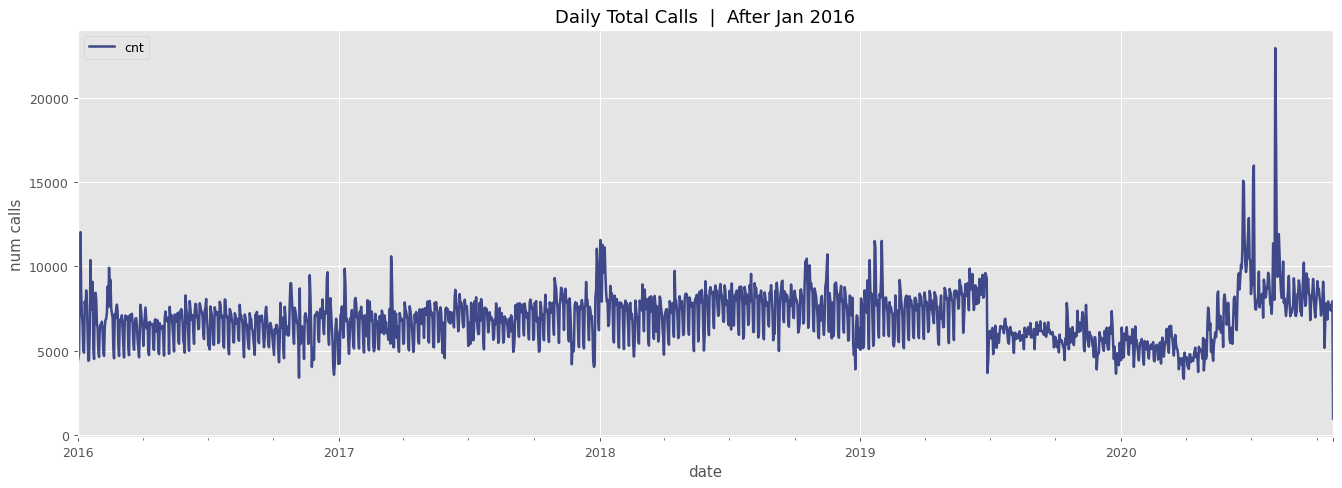

In [45]:
plt.figure(figsize=(18,6), dpi=90)
ax = plt.subplot()
daily_gt2016.set_index('_dt').plot(color=[clrs[4]], linewidth=2, ax = ax)

ax.set_xlabel('date')
ax.set_ylabel('num calls')
ax.set_title('Daily Total Calls  |  After Jan 2016')

plt.savefig('fig/daily_gte2016.png')

In [40]:
monthly = temp[(temp['_dt'] >= '2018-04-01') & (temp['_dt'] <= '2018-08-31')]

In [41]:
monthly.head()

,_dt,cnt
3012,2018-04-01,4769
3013,2018-04-02,7066
3014,2018-04-03,7275
3015,2018-04-04,7447
3016,2018-04-05,7475


## Zoom in 5 month period

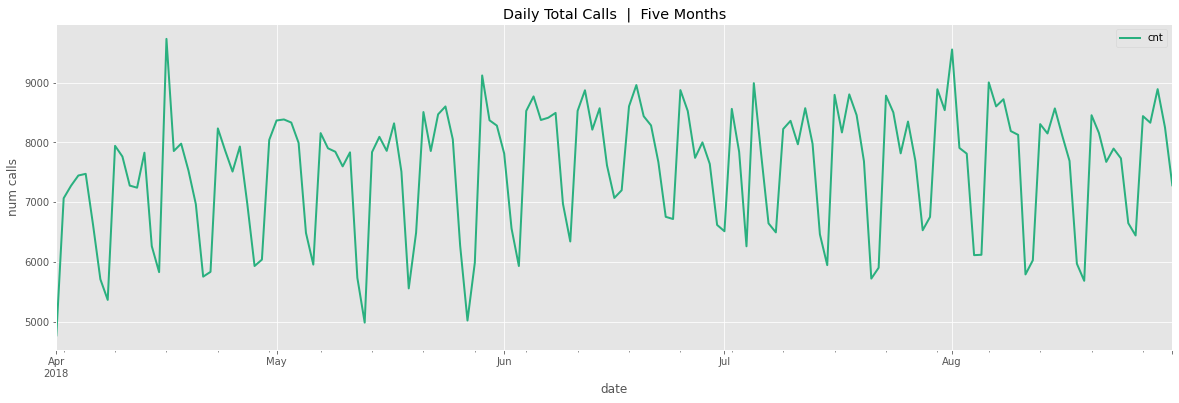

In [46]:
plt.figure(figsize=(20,6))
ax = plt.subplot()
monthly.set_index('_dt').plot(color=[clrs[6]], linewidth=2, ax = ax)

ax.set_xlabel('date')
ax.set_ylabel('num calls')
ax.set_title('Daily Total Calls  |  Five Months')

plt.savefig('fig/daily_5mo.png')

In [ ]:
data = df[df.created_date >= '2016-01-01']

data.shape

(12175484, 18)

In [ ]:
data.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,cross_street_1,cross_street_2,status,due_date,resolution_action_updated_date,borough,open_data_channel_type,cnt,dt
0,42147537,2019-04-05 14:27:21,04/11/2019 07:31:35 AM,DOT,Department of Transportation,Street Condition,"Rough, Pitted or Cracked Roads",Street,10301,NaN,NaN,Closed,07/04/2019 02:27:21 PM,04/11/2019 07:31:35 AM,STATEN ISLAND,PHONE,1,2019-04-05
1,42147538,2019-04-05 23:00:01,04/06/2019 01:29:19 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10024,WEST 81 STREET,WEST 82 STREET,Closed,04/06/2019 07:00:01 AM,04/06/2019 01:29:19 AM,MANHATTAN,PHONE,1,2019-04-05
2,42147539,2019-04-05 09:38:05,04/05/2019 12:29:20 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Bike Lane,Street/Sidewalk,11106,36 AVENUE,37 AVENUE,Closed,04/05/2019 05:38:05 PM,04/05/2019 12:29:20 PM,QUEENS,ONLINE,1,2019-04-05
3,42147540,2019-04-05 09:49:18,04/16/2019 09:20:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,11223,AVENUE S,HIGHLAWN AVENUE,Closed,NaN,04/16/2019 09:20:00 AM,BROOKLYN,UNKNOWN,1,2019-04-05
4,42147541,2019-04-05 11:58:43,04/05/2019 09:55:00 PM,DOT,Department of Transportation,Street Condition,Pothole,NaN,10003,NaN,NaN,Closed,NaN,04/05/2019 09:55:00 PM,MANHATTAN,UNKNOWN,1,2019-04-05


In [ ]:
samp = data.sample(frac=.1, random_state=1929)
samp.shape

(1217548, 18)

In [ ]:
type_grp = samp[['complaint_type', 'cnt']].groupby('complaint_type').sum().sort_values('cnt',ascending=False)

In [ ]:
type_grp['perc'] = round(type_grp.cnt / type_grp.cnt.sum(), 4)

In [ ]:
type_grp['cum_perc'] = np.cumsum(type_grp.perc)

## Top complaint types

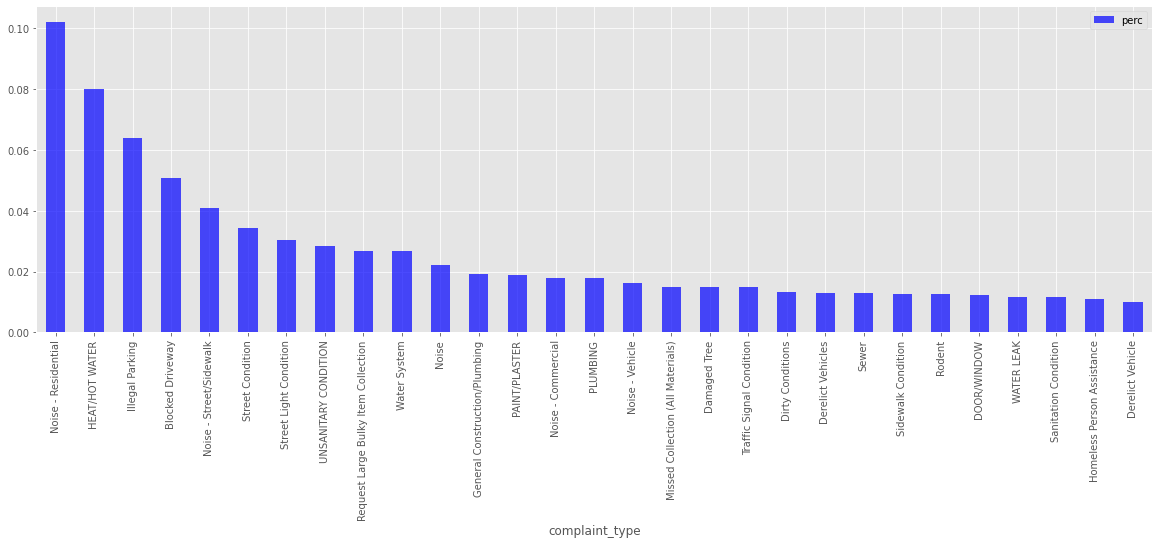

In [ ]:
type_grp[type_grp.perc >= .01][['perc']].plot(kind='bar', figsize=(20, 6), color='blue', alpha=.7)

In [ ]:
samp.open_data_channel_type.value_counts()

PHONE      586702
ONLINE     286438
UNKNOWN    169369
MOBILE     165155
OTHER        9884
Name: open_data_channel_type, dtype: int64

In [ ]:
samp.to_csv('nyc_311_>2016_samp.csv', index=False)

In [ ]:
data.to_csv('nyc_311_2016.csv', index=False)

In [ ]:
# del df

In [49]:
dfslice = df[(df['created_date'] >= '2018-04-01') & (df['created_date'] <= '2018-04-14')]

In [50]:
dfslice.shape

(89841, 18)

In [51]:
dfslice['hour_'] = dfslice.created_date.dt.hour
dfslice['min_'] = dfslice.created_date.dt.minute

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
dfslice.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,cross_street_1,cross_street_2,status,due_date,resolution_action_updated_date,borough,open_data_channel_type,cnt,_dt,hour_,min_
117536,42301036,2018-04-12 13:12:57,06/08/2018 12:00:00 AM,DOB,Department of Buildings,Construction Safety Enforcement,Best - DM Tracking Complaint,NaN,11206,NaN,NaN,Closed,NaN,06/08/2018 12:00:00 AM,BROOKLYN,UNKNOWN,1,2018-04-12,13,12
117816,42301326,2018-04-09 14:44:39,04/12/2018 12:00:00 AM,DOB,Department of Buildings,Construction Safety Enforcement,Best - High-Rise Tracking Complaint,NaN,11201,NaN,NaN,Closed,NaN,04/12/2018 12:00:00 AM,BROOKLYN,UNKNOWN,1,2018-04-09,14,44
118118,42301645,2018-04-13 11:39:01,04/17/2018 12:00:00 AM,DOB,Department of Buildings,Construction Safety Enforcement,Best - High-Rise Tracking Complaint,NaN,10018,NaN,NaN,Closed,NaN,04/17/2018 12:00:00 AM,MANHATTAN,UNKNOWN,1,2018-04-13,11,39
118193,42301729,2018-04-05 09:40:52,05/02/2018 12:00:00 AM,DOB,Department of Buildings,Construction Safety Enforcement,Best - High-Rise Tracking Complaint,NaN,10028,NaN,NaN,Closed,NaN,05/02/2018 12:00:00 AM,MANHATTAN,UNKNOWN,1,2018-04-05,9,40
118402,42301942,2018-04-09 11:10:36,09/05/2018 12:00:00 AM,DOB,Department of Buildings,Construction Safety Enforcement,Interior Demo Tracking Complaint,NaN,10007,NaN,NaN,Closed,NaN,09/05/2018 12:00:00 AM,MANHATTAN,UNKNOWN,1,2018-04-09,11,10


cnt
_dt        hour_ min_     
2018-04-06 0     0      92
                 1       4
                 2       5
                 3       4
                 4       3

## Minute totals

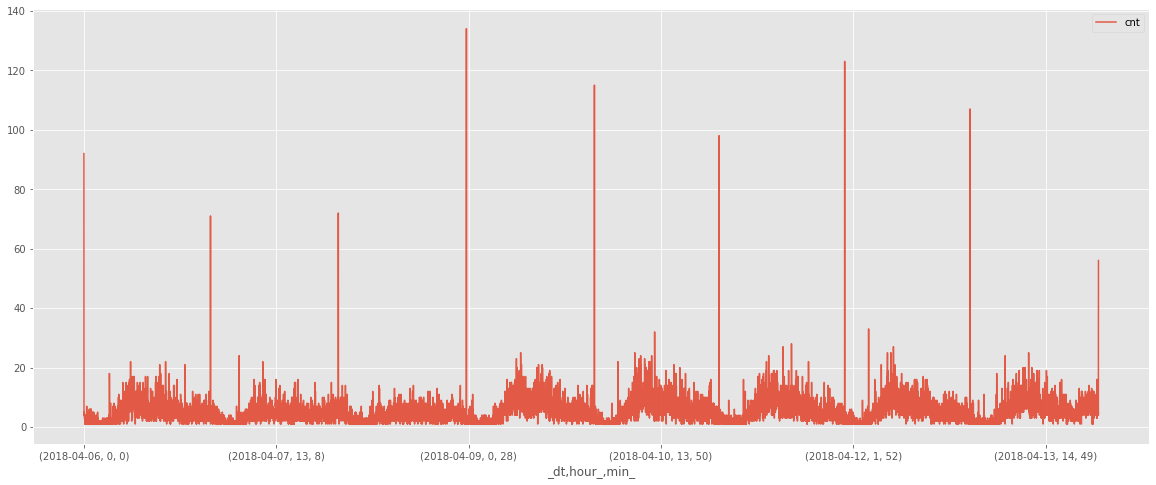

In [58]:
min_grp = dfslice[dfslice.created_date>='2018-04-06'][['_dt', 'hour_', 'min_', 'cnt']].groupby(['_dt', 'hour_', 'min_',]).sum()
min_grp.head()
min_grp.plot(figsize=(20,8), alpha=.9)

## Hourly totals

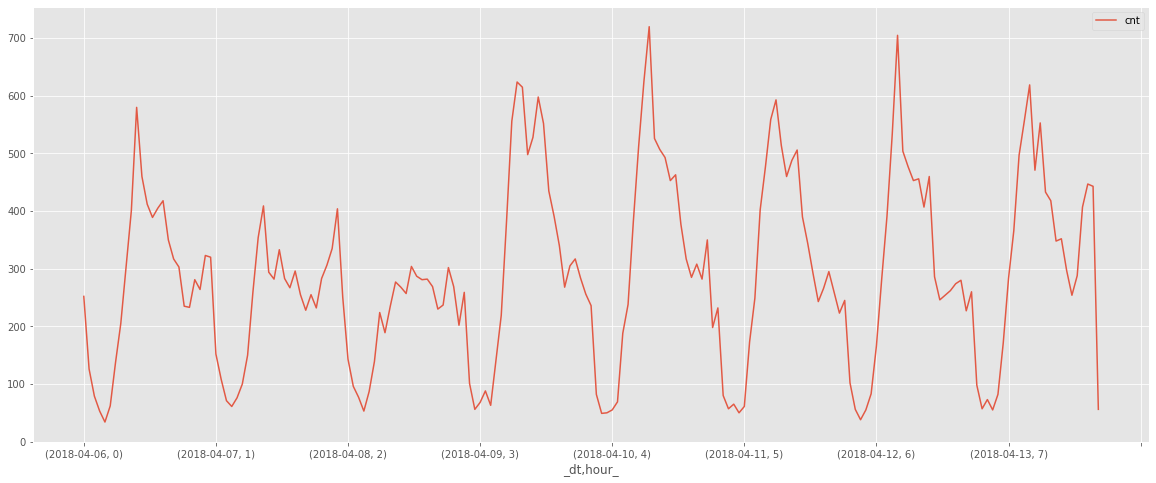

In [57]:
hr_grp = dfslice[dfslice.created_date>='2018-04-06'][['_dt', 'hour_', 'cnt']].groupby(['_dt', 'hour_']).sum()
hr_grp.plot(figsize=(20,8), alpha=.9)

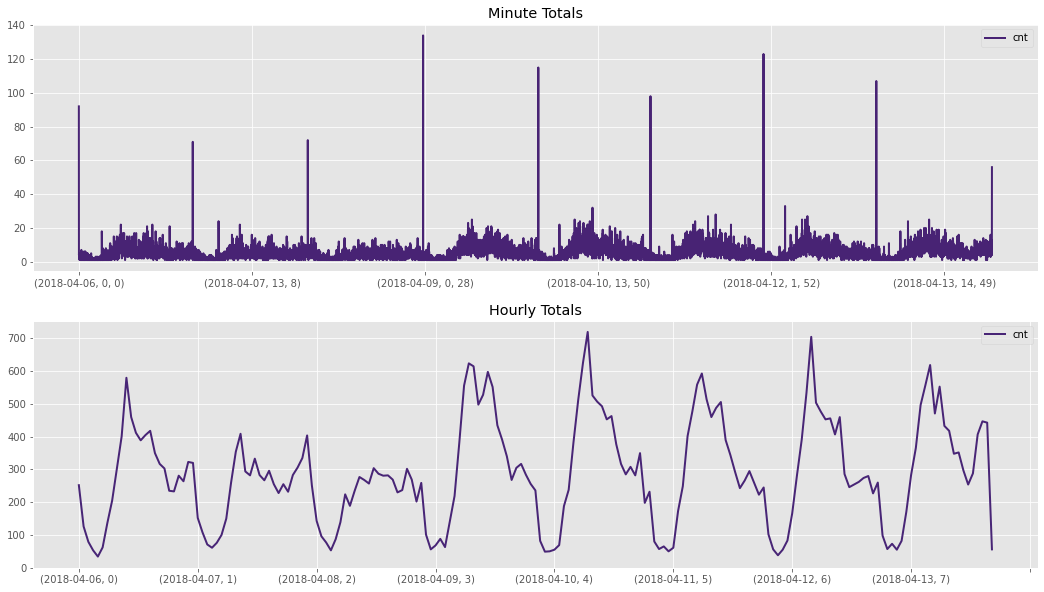

In [66]:
plt.figure(figsize=(18,10))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

min_grp.plot(color=[clrs[2]],linewidth=2, ax=ax1)
ax1.set_title('Minute Totals')
ax1.set_xlabel(None)

hr_grp.plot(color=[clrs[3]],linewidth=2, ax=ax2)
ax2.set_title('Hourly Totals')
ax2.set_xlabel(None)

plt.savefig('fig/min_hrly.png')

# Pick up here...

In [67]:
data = pd.read_csv('nyc_311_2016.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12175484 entries, 0 to 12175483
Data columns (total 18 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   unique_key                      int64 
 1   created_date                    object
 2   closed_date                     object
 3   agency                          object
 4   agency_name                     object
 5   complaint_type                  object
 6   descriptor                      object
 7   location_type                   object
 8   incident_zip                    object
 9   cross_street_1                  object
 10  cross_street_2                  object
 11  status                          object
 12  due_date                        object
 13  resolution_action_updated_date  object
 14  borough                         object
 15  open_data_channel_type          object
 16  cnt                             int64 
 17  dt                              object
dtype

In [ ]:
data.isnull().sum()

unique_key                              0
created_date                            0
closed_date                        370675
agency                                  0
agency_name                             0
complaint_type                          0
descriptor                         263031
location_type                     2753074
incident_zip                       506759
cross_street_1                    4750097
cross_street_2                    4778606
status                                  0
due_date                          8109053
resolution_action_updated_date     234584
borough                                 0
open_data_channel_type                  0
cnt                                     0
dt_                                     0
dtype: int64

In [69]:
def cat_desc(df, col):

  temp = df[col].value_counts().reset_index()
  nlevels = temp.shape[0]
  temp.columns = [col, 'cnt']
  tot = temp.cnt.sum()
  temp['perc'] = round(temp.cnt / tot, 4)

  if nlevels > 15:
      group_vals = ['other'] + temp.iloc[15:,1:].sum(axis=0).values.tolist()
      group_vals[-1] = round(group_vals[-1], 4)
      group = dict(zip(temp.columns.tolist(), group_vals))
      temp = temp[:15].append(group, ignore_index=True)
  print(f'Num `{col}` categories:  {nlevels}\n\n')
  
  return temp

In [ ]:
agency_dist = cat_desc(data, 'agency_name')
agency_dist

Num `agency_name` categories:  1437




,agency_name,cnt,perc
0,New York City Police Department,4081538.0,0.3352
1,Department of Housing Preservation and Develop...,2502612.0,0.2055
2,Department of Transportation,1335864.0,0.1097
3,Department of Environmental Protection,881514.0,0.0724
4,Department of Buildings,593358.0,0.0487
5,Department of Parks and Recreation,558883.0,0.0459
6,Department of Sanitation,467698.0,0.0384
7,Department of Health and Mental Hygiene,311180.0,0.0256
8,Taxi and Limousine Commission,133699.0,0.0110
9,Department of Consumer Affairs,101648.0,0.0083


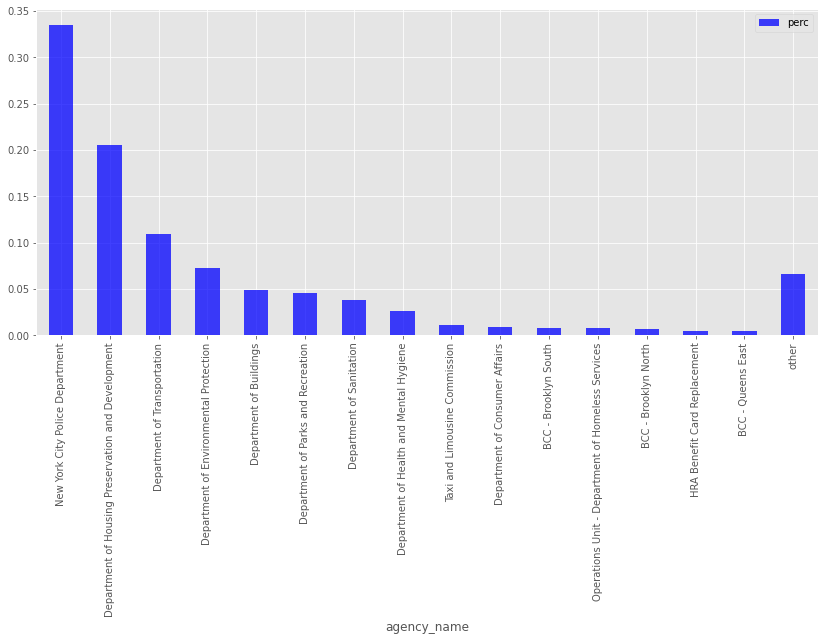

In [ ]:
agency_dist.plot('agency_name', 'perc', kind='bar', figsize=(14, 6), color='blue', alpha=.75)

In [ ]:
agency_dist.plot?

In [ ]:
cat_desc(data, 'complaint_type')

Num `complaint_type` categories:  411


                         complaint_type        cnt    perc
0                   Noise - Residential  1243053.0  0.1021
1                        HEAT/HOT WATER   971516.0  0.0798
2                       Illegal Parking   780959.0  0.0641
3                      Blocked Driveway   618701.0  0.0508
4               Noise - Street/Sidewalk   493411.0  0.0405
5                      Street Condition   420689.0  0.0346
6                Street Light Condition   371703.0  0.0305
7                  UNSANITARY CONDITION   346304.0  0.0284
8   Request Large Bulky Item Collection   326335.0  0.0268
9                          Water System   320690.0  0.0263
10                                Noise   271307.0  0.0223
11        General Construction/Plumbing   236913.0  0.0195
12                        PAINT/PLASTER   231519.0  0.0190
13                   Noise - Commercial   218585.0  0.0180
14                             PLUMBING   216504.0  0.0178
15              

In [72]:
loc = cat_desc(data, 'location_type')
loc

Num `location_type` categories:  168




,location_type,cnt,perc
0,RESIDENTIAL BUILDING,2482443.0,0.2635
1,Street/Sidewalk,2368539.0,0.2514
2,Residential Building/House,1291237.0,0.1370
3,Street,1030477.0,0.1094
4,Sidewalk,974511.0,0.1034
5,Store/Commercial,220154.0,0.0234
6,Park,99650.0,0.0106
7,Club/Bar/Restaurant,92230.0,0.0098
8,Property Address,77769.0,0.0083
9,3+ Family Apt. Building,67662.0,0.0072


In [ ]:
cat_desc(data, 'borough')

Num `borough` categories:  6


         borough      cnt    perc
0       BROOKLYN  3737179  0.3069
1         QUEENS  2912486  0.2392
2      MANHATTAN  2450005  0.2012
3          BRONX  2296240  0.1886
4  STATEN ISLAND   618353  0.0508
5    Unspecified   161221  0.0132


In [ ]:
cat_desc(data, 'open_data_channel_type')

Num `open_data_channel_type` categories:  5


  open_data_channel_type      cnt    perc
0                  PHONE  5863404  0.4816
1                 ONLINE  2866810  0.2355
2                UNKNOWN  1697427  0.1394
3                 MOBILE  1649058  0.1354
4                  OTHER    98785  0.0081


In [ ]:
cat_desc(data, 'incident_zip')

Num `incident_zip` categories:  2146


   incident_zip         cnt    perc
0         11226    136315.0  0.0117
1         10466    130453.0  0.0112
2         11385    120626.0  0.0103
3         10467    113973.0  0.0098
4         10457    102690.0  0.0088
5         10453    102688.0  0.0088
6         11207    102077.0  0.0087
7         10452    101311.0  0.0087
8         10468     99292.0  0.0085
9         11221     98472.0  0.0084
10        11208     96465.0  0.0083
11        10458     92748.0  0.0079
12        10031     89558.0  0.0077
13        10456     89503.0  0.0077
14        11225     82594.0  0.0071
15        other  10109960.0  0.8658


In [71]:
# typ = cat_desc(data, 'complaint_type')
typ

,complaint_type,cnt,perc
0,Noise - Residential,1243053.0,0.1021
1,HEAT/HOT WATER,971516.0,0.0798
2,Illegal Parking,780959.0,0.0641
3,Blocked Driveway,618701.0,0.0508
4,Noise - Street/Sidewalk,493411.0,0.0405
5,Street Condition,420689.0,0.0346
6,Street Light Condition,371703.0,0.0305
7,UNSANITARY CONDITION,346304.0,0.0284
8,Request Large Bulky Item Collection,326335.0,0.0268
9,Water System,320690.0,0.0263


In [ ]:
complaints = data[['complaint_type', 'cnt']].groupby('complaint_type').sum()

In [ ]:
complaints.head()

,cnt
complaint_type,
$(sleep 11),1
${3804*3137},1
%2e%2e%2f%2e%2e%2f%2e%2e%2f...,1
%2e%2e%5c%2e%2e%5c%2e%2e%5c...,1
%2fetc%2fpasswd,1


In [ ]:
complaints.to_csv('complaints_totals.csv')

## Day of week

In [ ]:
import seaborn as sns

In [ ]:
data['dayofwk'] = data['dt_'].dt.dayofweek

In [ ]:
wkdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [ ]:
data['weekday'] = data.dayofwk.apply(lambda x: wkdays[x])

In [ ]:
data['dt_'] = data['dt_'].dt.date

In [ ]:
dow_agg = data[['dt_', 'weekday', 'cnt']].groupby(['dt_', 'weekday']).sum()

dow_agg.head()

,,cnt
dt_,weekday,
2016-01-01,Friday,4315
2016-01-02,Saturday,4569
2016-01-03,Sunday,4806
2016-01-04,Monday,8988
2016-01-05,Tuesday,12035


In [ ]:
dow_agg = dow_agg[:-2]

In [ ]:
dow_agg.tail()

,,cnt
dt_,weekday,
2020-10-18,Sunday,7547
2020-10-19,Monday,7747
2020-10-20,Tuesday,7425
2020-10-21,Wednesday,7385
2020-10-22,Thursday,7576


In [ ]:
dow = dow_agg.reset_index()

In [ ]:
dow = dow[['cnt', 'weekday']]

In [ ]:
dow = dow[3:]

In [ ]:
dow.head()

,cnt,weekday
3,8988,Monday
4,12035,Tuesday
5,8429,Wednesday
6,7151,Thursday
7,6522,Friday


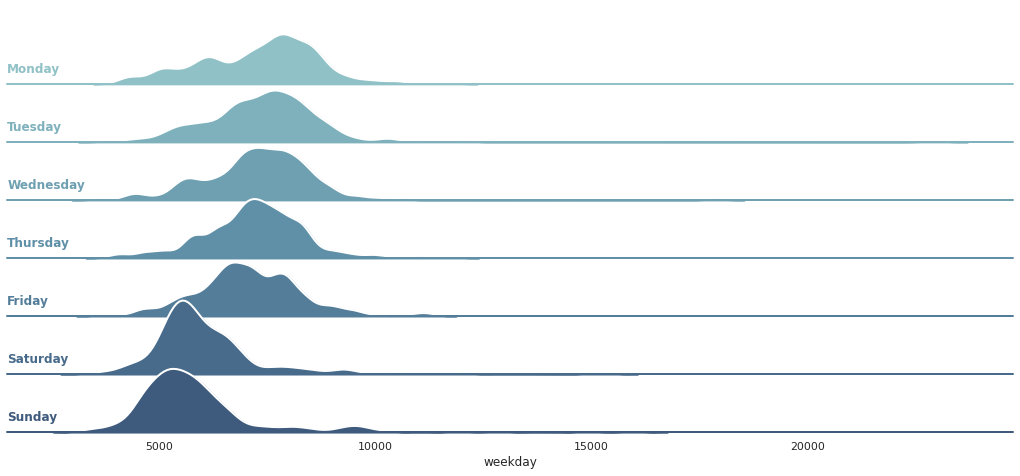

In [ ]:
# plt.figure(figsize=(15,9))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(dow, row="weekday", hue="weekday", aspect=15, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "cnt",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "cnt", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "weekday")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

## Complaint type

In [ ]:
top_types = data.complaint_type.value_counts().reset_index().head(15)
top_types.columns = ['complaint_type', 'cnt']
top_types['type_flg'] = 1

top_types

,complaint_type,cnt,type_flg
0,Noise - Residential,1243053,1
1,HEAT/HOT WATER,971516,1
2,Illegal Parking,780959,1
3,Blocked Driveway,618701,1
4,Noise - Street/Sidewalk,493411,1
5,Street Condition,420689,1
6,Street Light Condition,371703,1
7,UNSANITARY CONDITION,346304,1
8,Request Large Bulky Item Collection,326335,1
9,Water System,320690,1


In [ ]:
data = data.merge(top_types[['complaint_type', 'type_flg']], on='complaint_type', how='left')
data.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,cross_street_1,cross_street_2,status,due_date,resolution_action_updated_date,borough,open_data_channel_type,cnt,dt_,type_flg
0,42147537,2019-04-05 14:27:21,04/11/2019 07:31:35 AM,DOT,Department of Transportation,Street Condition,"Rough, Pitted or Cracked Roads",Street,10301,NaN,NaN,Closed,07/04/2019 02:27:21 PM,04/11/2019 07:31:35 AM,STATEN ISLAND,PHONE,1,2019-04-05 14:27:21,1.0
1,42147538,2019-04-05 23:00:01,04/06/2019 01:29:19 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10024,WEST 81 STREET,WEST 82 STREET,Closed,04/06/2019 07:00:01 AM,04/06/2019 01:29:19 AM,MANHATTAN,PHONE,1,2019-04-05 23:00:01,1.0
2,42147539,2019-04-05 09:38:05,04/05/2019 12:29:20 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Bike Lane,Street/Sidewalk,11106,36 AVENUE,37 AVENUE,Closed,04/05/2019 05:38:05 PM,04/05/2019 12:29:20 PM,QUEENS,ONLINE,1,2019-04-05 09:38:05,1.0
3,42147540,2019-04-05 09:49:18,04/16/2019 09:20:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,11223,AVENUE S,HIGHLAWN AVENUE,Closed,NaN,04/16/2019 09:20:00 AM,BROOKLYN,UNKNOWN,1,2019-04-05 09:49:18,1.0
4,42147541,2019-04-05 11:58:43,04/05/2019 09:55:00 PM,DOT,Department of Transportation,Street Condition,Pothole,NaN,10003,NaN,NaN,Closed,NaN,04/05/2019 09:55:00 PM,MANHATTAN,UNKNOWN,1,2019-04-05 11:58:43,1.0


In [ ]:
data.dt_ = data.dt_.dt.date

In [ ]:
top_types = data[data.type_flg == 1][['dt_', 'complaint_type', 'cnt']]
top_agg = top_types.groupby(['dt_', 'complaint_type']).sum()

top_agg.head()

cnt
dt_        complaint_type                    
2016-01-01 Blocked Driveway               337
           General Construction/Plumbing   26
           HEAT/HOT WATER                 949
           Illegal Parking                187
           Noise                           42

In [ ]:
pvt = top_agg.reset_index().pivot(index='dt_', columns='complaint_type')

In [ ]:
pvt.columns

MultiIndex([('cnt',                    'Blocked Driveway'),
            ('cnt',       'General Construction/Plumbing'),
            ('cnt',                      'HEAT/HOT WATER'),
            ('cnt',                     'Illegal Parking'),
            ('cnt',                               'Noise'),
            ('cnt',                  'Noise - Commercial'),
            ('cnt',                 'Noise - Residential'),
            ('cnt',             'Noise - Street/Sidewalk'),
            ('cnt',                       'PAINT/PLASTER'),
            ('cnt',                            'PLUMBING'),
            ('cnt', 'Request Large Bulky Item Collection'),
            ('cnt',                    'Street Condition'),
            ('cnt',              'Street Light Condition'),
            ('cnt',                'UNSANITARY CONDITION'),
            ('cnt',                        'Water System')],
           names=[None, 'complaint_type'])

In [ ]:
pvt[('cnt', 'NOISE')] = pvt.iloc[:,4:8].sum(axis=1)

In [ ]:
cols = [col[1] for col in pvt.columns.tolist()]
pvt.columns = cols

In [ ]:
pvt.head()

,Blocked Driveway,General Construction/Plumbing,HEAT/HOT WATER,Illegal Parking,Noise,Noise - Commercial,Noise - Residential,Noise - Street/Sidewalk,PAINT/PLASTER,PLUMBING,Request Large Bulky Item Collection,Street Condition,Street Light Condition,UNSANITARY CONDITION,Water System,NOISE
dt_,,,,,,,,,,,,,,,,
2016-01-01,337.0,26.0,949.0,187.0,42.0,153.0,1260.0,86.0,57.0,69.0,NaN,87.0,34.0,104.0,43.0,1541.0
2016-01-02,271.0,49.0,1362.0,186.0,99.0,152.0,691.0,72.0,68.0,67.0,NaN,86.0,49.0,112.0,89.0,1014.0
2016-01-03,279.0,30.0,1196.0,275.0,68.0,180.0,720.0,60.0,91.0,87.0,NaN,186.0,79.0,139.0,89.0,1028.0
2016-01-04,286.0,155.0,2720.0,287.0,113.0,68.0,358.0,40.0,303.0,277.0,NaN,315.0,453.0,386.0,146.0,579.0
2016-01-05,326.0,152.0,5053.0,276.0,126.0,72.0,313.0,26.0,344.0,363.0,NaN,305.0,409.0,404.0,314.0,537.0


In [ ]:
todrop = ['Noise',
'Noise - Commercial',
'Noise - Residential',
'Noise - Street/Sidewalk']

pltdata = pvt.drop(todrop, axis=1)

In [ ]:
reordr = pltdata.sum(axis=0).sort_values(ascending=False).index.tolist()

In [ ]:
pltdata = pltdata[reordr]

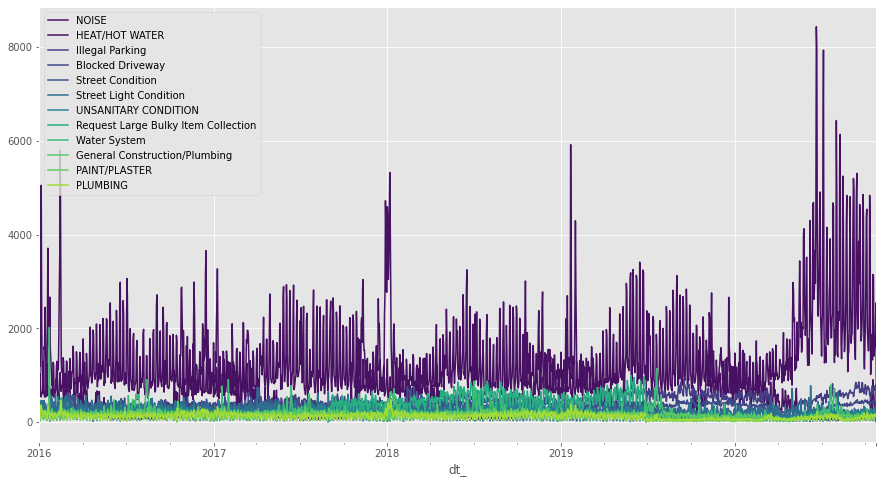

In [ ]:
clrs = plt.get_cmap('viridis')
rndom = np.sort(np.random.randint(10, clrs.N-25, pltdata.shape[1]))
pltclrs = np.array(clrs.colors)[rndom]


pltdata.plot(figsize=(15,8), color=pltclrs)

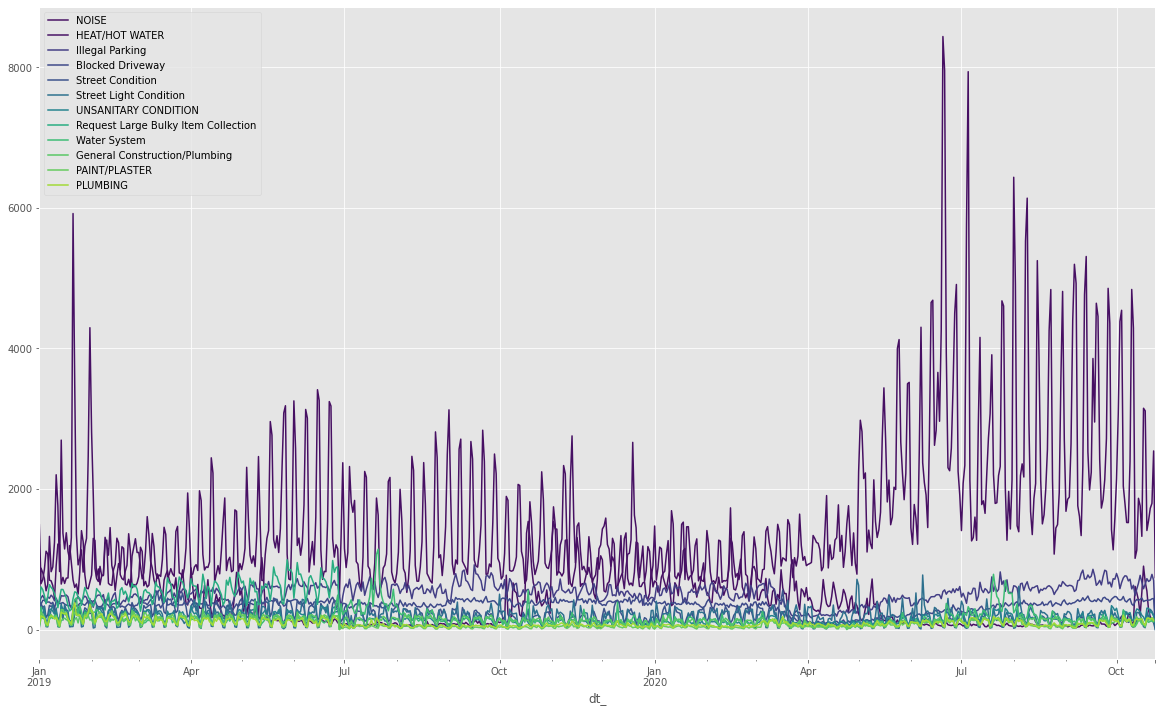

In [ ]:
pltdata.loc['2019-06-01':].plot(figsize=(18,10), color=pltclrs)

- Aggregate above weekly
- Cuts by Borough & Agency

In [ ]:
pltclrs

array([[0.      , 0.176082, 0.407577],
       [0.      , 0.178802, 0.414764],
       [0.110658, 0.22317 , 0.435067],
       [0.17549 , 0.253444, 0.42779 ],
       [0.180503, 0.25618 , 0.427299],
       [0.185453, 0.258914, 0.426788],
       [0.230871, 0.286134, 0.423498],
       [0.247605, 0.296986, 0.422917],
       [0.377371, 0.392404, 0.43489 ],
       [0.414992, 0.422937, 0.444578],
       [0.478186, 0.476699, 0.468845],
       [0.578236, 0.555673, 0.468724]])

In [ ]:
clrs.set_over(clrs.colors[150])

## Decomposing Calls per Day

In [ ]:
data.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,cross_street_1,cross_street_2,status,due_date,resolution_action_updated_date,borough,open_data_channel_type,cnt,dt_
0,42147537,2019-04-05 14:27:21,04/11/2019 07:31:35 AM,DOT,Department of Transportation,Street Condition,"Rough, Pitted or Cracked Roads",Street,10301,NaN,NaN,Closed,07/04/2019 02:27:21 PM,04/11/2019 07:31:35 AM,STATEN ISLAND,PHONE,1,2019-04-05
1,42147538,2019-04-05 23:00:01,04/06/2019 01:29:19 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10024,WEST 81 STREET,WEST 82 STREET,Closed,04/06/2019 07:00:01 AM,04/06/2019 01:29:19 AM,MANHATTAN,PHONE,1,2019-04-05
2,42147539,2019-04-05 09:38:05,04/05/2019 12:29:20 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Bike Lane,Street/Sidewalk,11106,36 AVENUE,37 AVENUE,Closed,04/05/2019 05:38:05 PM,04/05/2019 12:29:20 PM,QUEENS,ONLINE,1,2019-04-05
3,42147540,2019-04-05 09:49:18,04/16/2019 09:20:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,11223,AVENUE S,HIGHLAWN AVENUE,Closed,NaN,04/16/2019 09:20:00 AM,BROOKLYN,UNKNOWN,1,2019-04-05
4,42147541,2019-04-05 11:58:43,04/05/2019 09:55:00 PM,DOT,Department of Transportation,Street Condition,Pothole,NaN,10003,NaN,NaN,Closed,NaN,04/05/2019 09:55:00 PM,MANHATTAN,UNKNOWN,1,2019-04-05


In [ ]:
calls = data[['dt_', 'cnt']].groupby('dt_').sum()

In [ ]:
calls.columns = ['num_calls']
calls.head()

,num_calls
dt_,
2016-01-01,4315
2016-01-02,4569
2016-01-03,4806
2016-01-04,8988
2016-01-05,12035


In [ ]:
calls.index = pd.to_datetime(calls.index)

calls.head()

,num_calls
dt_,
2016-01-01,4315
2016-01-02,4569
2016-01-03,4806
2016-01-04,8988
2016-01-05,12035


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
add = seasonal_decompose(calls, model='additive', extrapolate_trend='freq')
add_df = pd.concat([add.seasonal, add.trend, add.resid, add.observed], axis=1)
add_df.columns = ['seasonal', 'add_trend', 'resid', 'actual_values']
add_df.head()

,seasonal,add_trend,resid,actual_values
dt_,,,,
2016-01-01,158.519201,7843.969388,-3687.488589,4315
2016-01-02,-804.496631,7747.280612,-2373.783981,4569
2016-01-03,-1024.940554,7650.591837,-1819.651283,4806
2016-01-04,434.868862,7184.714286,1368.416852,8988
2016-01-05,548.531924,7500.000000,3986.468076,12035


In [ ]:
multiply = seasonal_decompose(calls, model='multiplicative', extrapolate_trend='freq')
multiply_df = pd.concat([multiply.seasonal, multiply.trend, multiply.resid, multiply.observed], axis=1)
multiply_df.columns = ['seasonal', 'mlt_trend', 'resid', 'actual_values']
multiply_df.head()

,seasonal,mlt_trend,resid,actual_values
dt_,,,,
2016-01-01,1.024873,7843.969388,0.536753,4315
2016-01-02,0.882052,7747.280612,0.668618,4569
2016-01-03,0.847730,7650.591837,0.741022,4806
2016-01-04,1.063608,7184.714286,1.176176,8988
2016-01-05,1.079023,7500.000000,1.487148,12035


Text(0.5, 0.98, 'Additive Decompose')

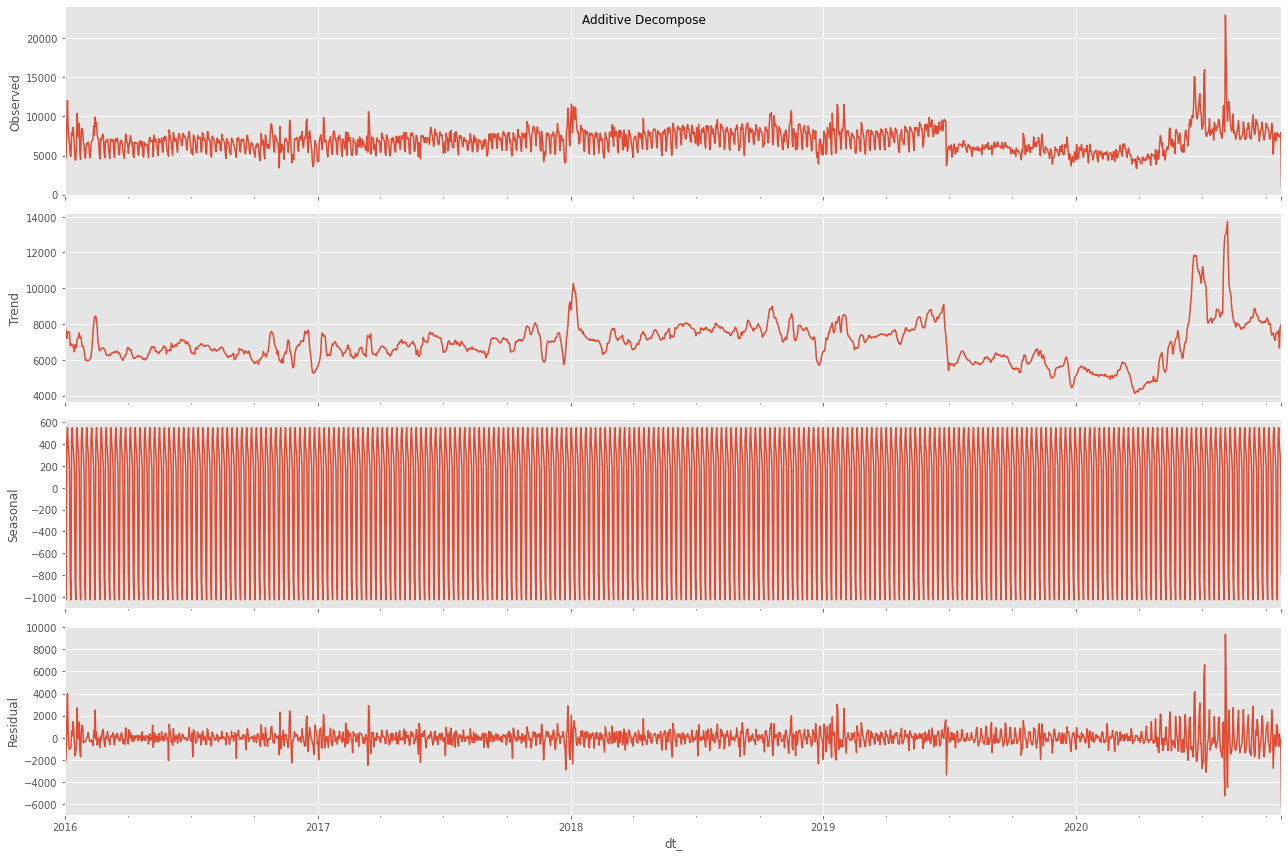

In [ ]:
plt.rcParams.update({'figure.figsize': (18,12)})
additive.plot().suptitle('Additive Decompose')

Text(0.5, 0.98, 'Multiplicative Decompose')

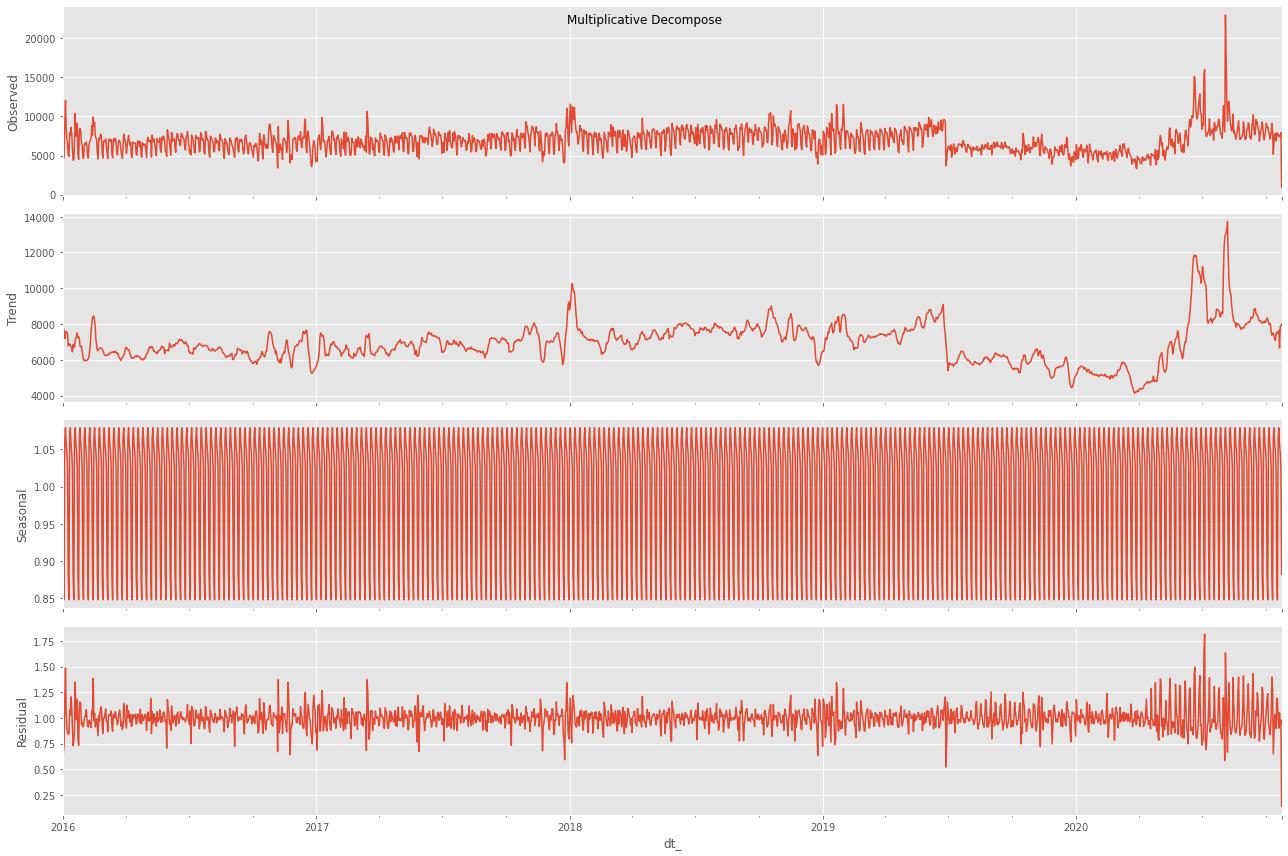

In [ ]:
multiply.plot().suptitle('Multiplicative Decompose')

In [ ]:
trends = pd.concat([add_df['add_trend'], multiply_df['mlt_trend'], calls['num_calls']], axis=1)
trends.head()

,add_trend,mlt_trend,num_calls
dt_,,,
2016-01-01,7843.969388,7843.969388,4315
2016-01-02,7747.280612,7747.280612,4569
2016-01-03,7650.591837,7650.591837,4806
2016-01-04,7184.714286,7184.714286,8988
2016-01-05,7500.000000,7500.000000,12035


In [ ]:
cmap = plt.get_cmap('viridis')
rndom = np.sort(np.random.randint(10, cmap.N-25, 15))
clrs = np.array(cmap.colors)[rndom]
clrs = clrs[[2,13]]

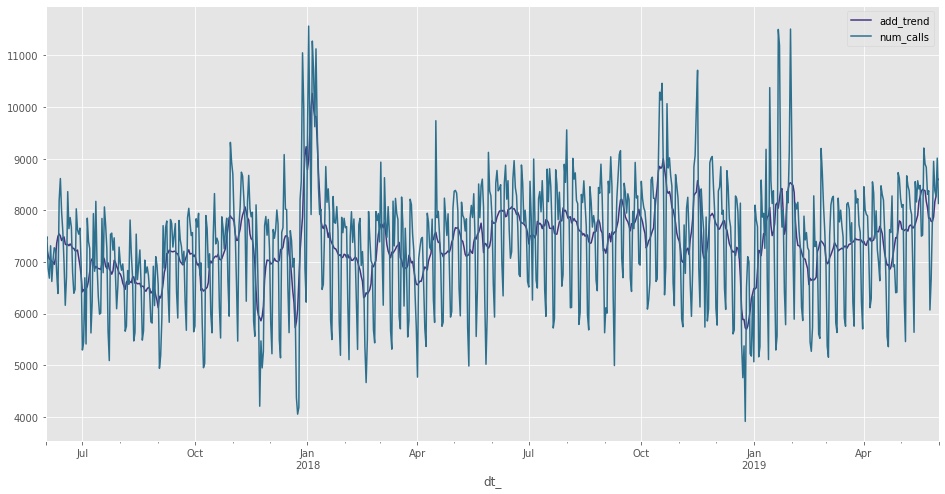

In [ ]:
trends['2017-06-01':'2018-06-01'][['add_trend','num_calls']].plot(figsize=(16, 8), color=clrs)

## Upload to BigQuery

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
project_id = 'agio-take-home'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://agio-data/


In [ ]:
!ls

311_SR_Data_Dictionary_2018.xlsx  nyc_311_data.csv   nyc_311_getData.ipynb
nyc_311_2016.csv		  nyc_311_EDA.ipynb  nyc_raw_subset.csv


In [ ]:
!gsutil cp /agio/nyc_raw_subset.csv gs://agio-data/

Copying file:///agio/nyc_raw_subset.csv [Content-Type=text/csv]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

/
Operation completed over 1 objects/5.0 GiB.                                      
